In [45]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import requests

In [16]:
data_folder = "../../Data/Sanral_Hackathon/"

In [19]:
ls ../../Data/Sanral_Hackathon/

HackETC/


In [20]:
transactions = pd.read_csv(data_folder + 'HackETC/Transactions.csv')

In [21]:
transactions.head()

,IU_IUID,TTD_PID,TTD_DT,TT_TAID,TTD_TSID,IU_ACID,IU_LPN,IU_COCO,IU_RGCO,TT_PAN_PACN,IUD_OVCL,IUD_AP,IUD_TOAM,IUD_VATY,IUD_ID
0,4225968097,1aac18ff327de81180d75cb901dd2ab8,2018-06-30 16:31:29,45,116,2855882,NaN,NaN,NaN,6.272062e+15,4,179.0,179.0,0,460529075
1,4225972533,1aaca8f2f67ce81180d75cb901dd2ab8,2018-06-30 18:53:48,40,153,4918287,NaN,NaN,NaN,6.272061e+15,4,40.0,40.0,0,460420539
2,4225972671,1361c33f347de81180d75cb901dd2ab8,2018-06-30 20:24:09,45,117,5218431,NaN,NaN,NaN,6.272061e+15,2,43.0,43.0,0,460530745
3,4225972762,60e57121337de81180d75cb901dd2ab8,2018-06-30 17:39:33,45,116,4734114,NaN,NaN,NaN,6.272061e+15,4,179.0,179.0,0,460530172
4,4225972794,05227846f67ce81180d75cb901dd2ab8,2018-06-30 17:57:38,40,424,4723772,NaN,NaN,NaN,6.272061e+15,4,64.0,64.0,0,460420414


In [33]:
transactions.describe()

,IU_IUID,TT_TAID,TTD_TSID,IU_ACID,TT_PAN_PACN,IUD_OVCL,IUD_AP,IUD_TOAM,IUD_VATY,IUD_ID
count,2.638803e+06,2.638803e+06,2.638803e+06,2.638803e+06,1.173615e+06,2.638803e+06,2.638803e+06,2.638803e+06,2.638803e+06,2.638803e+06
mean,4.333602e+09,1.361152e+01,9.072908e+02,2.342028e+06,6.225005e+15,2.574291e+00,2.518951e+01,2.753082e+01,1.802668e+00,9.621102e+09
std,6.145520e+07,1.658915e+01,2.964219e+02,2.289547e+06,4.972723e+14,8.727206e-01,6.189914e+01,6.159882e+01,1.126588e+00,4.782970e+09
min,4.225968e+09,5.000000e+00,3.300000e+01,0.000000e+00,9.700308e+14,1.000000e+00,0.000000e+00,4.300000e-01,0.000000e+00,4.602924e+08
25%,4.280192e+09,5.000000e+00,1.007000e+03,0.000000e+00,6.272061e+15,2.000000e+00,1.740000e+00,2.980000e+00,2.000000e+00,1.188373e+10
50%,4.333706e+09,5.000000e+00,1.020000e+03,2.551255e+06,6.272061e+15,2.000000e+00,2.980000e+00,3.910000e+00,2.000000e+00,1.205614e+10
75%,4.387195e+09,5.000000e+00,1.033000e+03,4.765622e+06,6.272061e+15,4.000000e+00,8.900000e+00,1.456000e+01,2.000000e+00,1.221078e+10
max,4.440933e+09,5.300000e+01,1.115000e+03,5.306444e+06,6.272062e+15,4.000000e+00,5.090000e+02,5.090000e+02,4.000000e+00,1.236878e+10


In [31]:
pd.to_datetime(transactions.TTD_DT).dt.date.min()

datetime.date(2018, 5, 3)

In [32]:
pd.to_datetime(transactions.TTD_DT).dt.date.max()

datetime.date(2018, 9, 30)

In [34]:
toll_sections = pd.read_csv(data_folder + 'HackETC/TollSections.csv')

In [36]:
toll_sections.head()

,TAID,TSID,TSName,RouteName,RouteAreaName,Coord_Y,Coord_X
0,5,1001,N1:T 1:Barbet,N1,N1-North,-25.756190,28.274521
1,5,1002,N1:T 2:Mossie,N1,N1-South,-25.818789,28.253995
2,5,1003,N1:T 3:Indlazi,N1,N1-North,-25.844374,28.230317
3,5,1004,N1:T 4:Pikoko,N1,N1-South,-25.873222,28.179849
4,5,1005,N1:T 5:Ivusi,N1,N1-North,-25.897896,28.163206


In [38]:
toll_sections.describe()

,TAID,TSID,Coord_Y,Coord_X
count,184.000000,184.000000,184.000000,184.000000
mean,36.190217,641.358696,-26.889244,28.570057
std,17.614007,437.931266,2.129826,1.688481
min,5.000000,33.000000,-33.950357,19.071967
25%,40.000000,141.000000,-28.458100,28.114896
50%,44.000000,1003.500000,-26.170140,28.287741
75%,48.000000,1055.250000,-25.748829,29.561652
max,53.000000,1115.000000,-22.647138,31.737755


In [42]:
unique_toll_sections = toll_sections.drop_duplicates(subset=['TAID', 'TSID'])

##### map the tolls

In [48]:
unique_toll_sections['Coordinates'] = list(zip(unique_toll_sections.Coord_X, unique_toll_sections.Coord_Y))

In [49]:
unique_toll_sections['Coordinates'] = unique_toll_sections['Coordinates'].apply(Point)

In [51]:
gdf_unique_toll_sections = gpd.GeoDataFrame(unique_toll_sections, geometry='Coordinates')

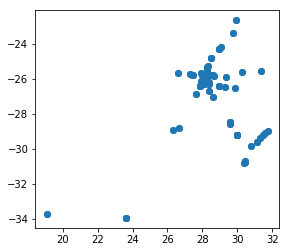

In [53]:
gdf_unique_toll_sections.plot();

In [54]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [59]:
gdf_unique_toll_sections.crs = {'init': 'epsg:4326'}
gdf_unique_toll_sections.to_crs(epsg=3857, inplace=True)

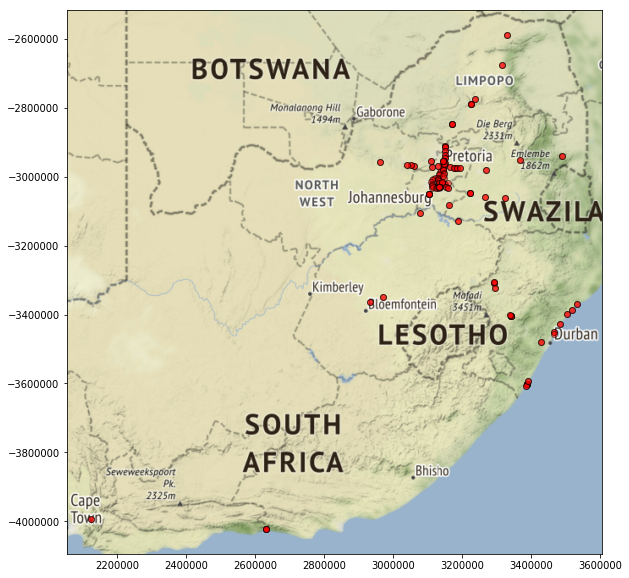

In [72]:
ax = gdf_unique_toll_sections.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', color='red')
add_basemap(ax, zoom=6)

In [67]:
len(transactions.IU_LPN.unique())

376229

##### plot someone's journeys

In [75]:
car = transactions.IU_LPN.unique()[2]

In [79]:
df_car = transactions.loc[transactions.IU_LPN == car]
df_car = pd.merge(df_car, toll_sections, left_on = ['TT_TAID', 'TTD_TSID'], right_on= ['TAID', 'TSID'])

In [91]:
df_car['Coordinates'] = list(zip(df_car.Coord_X, df_car.Coord_Y))
df_car['Coordinates'] = df_car['Coordinates'].apply(Point)
gdf_car = gpd.GeoDataFrame(df_car, geometry='Coordinates')
gdf_car.crs = {'init': 'epsg:4326'}
gdf_car.to_crs(epsg=3857, inplace=True)

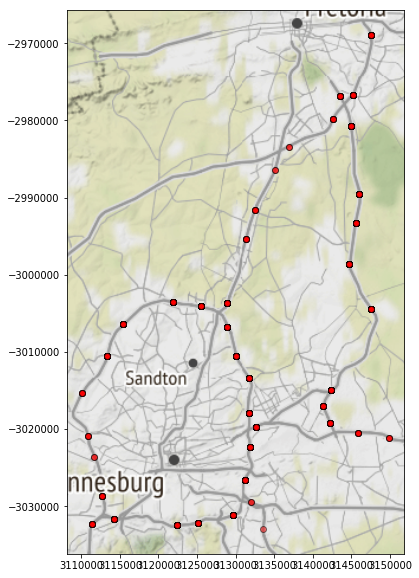

In [99]:
ax = gdf_car.plot(figsize=(12, 10), alpha=0.5, edgecolor='k', color='red')
add_basemap(ax, zoom=10)

In [100]:
vehicle_type = pd.read_csv(data_folder + 'HackETC/VehicleClasses.csv')

In [101]:
vehicle_type

,OVCL,OVCL_Description,Precedence
0,1,A1 - Motorcycles,1
1,2,A2 - Light Vehicles,2
2,3,B - Small Heavy vehicles,3
3,4,C - Large Heavy vehicles,4


In [102]:
transactions.groupby(['IUD_OVCL']).count()

,IU_IUID,TTD_PID,TTD_DT,TT_TAID,TTD_TSID,IU_ACID,IU_LPN,IU_COCO,IU_RGCO,TT_PAN_PACN,IUD_AP,IUD_TOAM,IUD_VATY,IUD_ID
IUD_OVCL,,,,,,,,,,,,,,
1,2956,2956,2956,2956,2956,2956,1647,1647,1647,110,2956,2956,2956,2956
2,1796835,1796835,1796835,1796835,1796835,1796835,1632183,1632101,1632183,505919,1796835,1796835,1796835,1796835
3,159626,159626,159626,159626,159626,159626,134376,134363,134376,81910,159626,159626,159626,159626
4,679386,679386,679386,679386,679386,679386,292899,292807,292899,585676,679386,679386,679386,679386


In [105]:
transactions.TTD_DT = pd.to_datetime(transactions.TTD_DT)

In [111]:
transactions['peak'] = transactions.TTD_DT.dt.hour.between(7,9) | transactions.TTD_DT.dt.hour.between(16,18)

In [112]:
transactions.groupby(['IUD_OVCL', 'peak']).count()

IU_IUID  TTD_PID   TTD_DT  TT_TAID  TTD_TSID  IU_ACID  \
IUD_OVCL peak                                                           
1        False     2204     2204     2204     2204      2204     2204   
         True       752      752      752      752       752      752   
2        False  1275387  1275387  1275387  1275387   1275387  1275387   
         True    521448   521448   521448   521448    521448   521448   
3        False   110455   110455   110455   110455    110455   110455   
         True     49171    49171    49171    49171     49171    49171   
4        False   476664   476664   476664   476664    476664   476664   
         True    202722   202722   202722   202722    202722   202722   

                 IU_LPN  IU_COCO  IU_RGCO  TT_PAN_PACN   IUD_AP  IUD_TOAM  \
IUD_OVCL peak                                                               
1        False     1230     1230     1230           83     2204      2204   
         True       417      417      417           27      752       752   
2        False  1154229  1154172  1154229       356938  1275387   1275387   
         True    477954   477929   477954       148981   521448    521448   
3        False    92656    92648    92656        57147   110455    110455   
         True     41720    41715    41720        24763    49171     49171   
4        False   201690   201629   201690       412083   476664    476664   
         True     91209    91178    91209       173593   202722    202722   

                IUD_VATY   IUD_ID  
IUD_OVCL peak                      
1        False      2204     2204  
         True        752      752  
2        False   1275387  1275387  
         True     521448   521448  
3        False    110455   110455  
         True      49171    49171  
4        False    476664   476664  
         True     202722   202722

In [113]:
discounting_rules = pd.read_csv(data_folder + 'HackETC/DiscountingRules.csv')

In [114]:
discounting_rules

,RuleID,TAID,RuleName,RuleType,RuleMode,Value,DTFrom,DTTo
0,0,40,Bakwena - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
1,0,43,SANRAL - N2 South Coast - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
2,0,44,SANRAL - N17 - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
3,0,45,SANRAL - N1 Great North - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
4,0,46,SANRAL - N3 Mariannhill - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
5,0,47,SANRAL - N1 South Vaal - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
6,0,48,N4TRAC - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
7,0,49,N3TC - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
8,0,50,SANRAL - N4 Magalies - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN
9,0,51,SANRAL - N1 Huguenot - Frequent User,Frequent User,Percentage,0.00,2018-04-11 22:00:00,NaN


In [122]:
discounts = pd.read_csv(data_folder + 'HackETC/Transactions_Discounts.csv')

In [123]:
discounts.head()

,ODIU_ID,ORDER_ID,TAID,DISCOUNTAMT,DISCOUNTTYPE
0,460292378,1,43,13.0,0
1,460292379,1,43,15.5,0
2,460292455,1,51,38.0,0
3,460292680,1,40,23.0,65
4,460292694,1,52,13.0,0


In [116]:
discounting_rules.query('RuleType in ["Public transportation", "Public Transportation"]')

,RuleID,TAID,RuleName,RuleType,RuleMode,Value,DTFrom,DTTo
21,11,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,30.00,2012-04-20 14:27:28,2050-12-30 22:00:00
24,14,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,10.00,2012-05-22 16:34:14,2050-12-30 22:00:00
29,19,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,10.65,2012-04-20 14:27:28,2050-12-30 22:00:00
31,24,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,30.00,2013-07-23 11:26:52,2050-12-30 22:00:00
32,25,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,30.00,2013-07-23 11:27:54,2050-12-30 22:00:00
33,26,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,30.00,2013-07-23 11:29:25,2050-12-30 22:00:00
34,27,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,30.00,2013-07-23 11:30:04,2050-12-30 22:00:00
35,28,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,72.00,2013-07-23 11:30:54,2050-12-30 22:00:00
54,47,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,95.00,2013-07-23 11:49:02,2050-12-30 22:00:00
64,57,40,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,30.00,2014-03-18 22:20:02,2050-12-30 22:00:00


In [131]:
public_transport_transactions = pd.merge(pd.merge(transactions, discounts, how='left', right_on='ODIU_ID', left_on='IUD_ID'), discounting_rules, how='left',  left_on=['DISCOUNTTYPE', 'TAID'], right_on=['RuleID', 'TAID']).query('RuleType in ["Public transportation", "Public Transportation"]')

In [132]:
public_transport_transactions.head()

,IU_IUID,TTD_PID,TTD_DT,TT_TAID,TTD_TSID,IU_ACID,IU_LPN,IU_COCO,IU_RGCO,TT_PAN_PACN,...,TAID,DISCOUNTAMT,DISCOUNTTYPE,RuleID,RuleName,RuleType,RuleMode,Value,DTFrom,DTTo
147,4226074583,03e8621b3c7de81180d75cb901dd2ab8,2018-07-01 14:30:11,40,103,3337701,NaN,NaN,NaN,9.700311e+14,...,40.0,23.0,65.0,65.0,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,100.0,2015-01-30 22:19:58,2050-12-30 22:00:00
148,4226074583,4b3fd58ae57ce81180d75cb901dd2ab8,2018-07-01 04:12:31,40,111,3337701,NaN,NaN,NaN,9.700311e+14,...,40.0,53.0,65.0,65.0,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,100.0,2015-01-30 22:19:58,2050-12-30 22:00:00
149,4226074583,4f30f719417de81180d75cb901dd2ab8,2018-07-01 15:04:53,40,113,3337701,NaN,NaN,NaN,9.700311e+14,...,40.0,53.0,65.0,65.0,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,100.0,2015-01-30 22:19:58,2050-12-30 22:00:00
150,4226074583,52b5e406157de81180d75cb901dd2ab8,2018-07-01 09:52:59,40,111,3337701,NaN,NaN,NaN,9.700311e+14,...,40.0,53.0,65.0,65.0,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,100.0,2015-01-30 22:19:58,2050-12-30 22:00:00
151,4226074583,658e4a4e657de81180d75cb901dd2ab8,2018-07-01 19:26:00,40,153,3337701,NaN,NaN,NaN,9.700311e+14,...,40.0,11.5,65.0,65.0,Bakwena - Fixed Amount,Public Transportation,Fixed Amount,100.0,2015-01-30 22:19:58,2050-12-30 22:00:00


In [133]:

len(public_transport_transactions)

17882

In [134]:
public_transport_transactions.describe()

,IU_IUID,TT_TAID,TTD_TSID,IU_ACID,TT_PAN_PACN,IUD_OVCL,IUD_AP,IUD_TOAM,IUD_VATY,IUD_ID,ODIU_ID,ORDER_ID,TAID,DISCOUNTAMT,DISCOUNTTYPE,RuleID,Value
count,1.788200e+04,17882.0,17882.000000,1.788200e+04,1.788200e+04,17882.000000,17882.0,17882.000000,17882.0,1.788200e+04,1.788200e+04,17882.000000,17882.0,17882.000000,17882.0,17882.0,17882.0
mean,4.334160e+09,40.0,265.556481,4.572810e+06,3.966470e+15,2.000112,0.0,19.966754,0.0,4.732366e+08,4.732366e+08,1.000839,40.0,19.966587,65.0,65.0,100.0
std,6.109194e+07,0.0,138.770605,4.850088e+05,2.628488e+15,0.010575,0.0,16.841193,0.0,7.189070e+06,7.189070e+06,0.028951,0.0,16.841341,0.0,0.0,0.0
min,4.226075e+09,40.0,101.000000,3.337701e+06,9.700308e+14,2.000000,0.0,5.200000,0.0,4.602927e+08,4.602927e+08,1.000000,40.0,5.000000,65.0,65.0,100.0
25%,4.281804e+09,40.0,143.000000,4.422563e+06,9.700311e+14,2.000000,0.0,10.500000,0.0,4.671135e+08,4.671135e+08,1.000000,40.0,10.500000,65.0,65.0,100.0
50%,4.335196e+09,40.0,181.000000,4.573229e+06,6.272061e+15,2.000000,0.0,14.000000,0.0,4.733662e+08,4.733662e+08,1.000000,40.0,14.000000,65.0,65.0,100.0
75%,4.385430e+09,40.0,404.000000,4.857698e+06,6.272061e+15,2.000000,0.0,21.000000,0.0,4.792849e+08,4.792849e+08,1.000000,40.0,21.000000,65.0,65.0,100.0
max,4.440926e+09,40.0,464.000000,5.281172e+06,6.272062e+15,3.000000,0.0,75.000000,0.0,4.857851e+08,4.857851e+08,2.000000,40.0,75.000000,65.0,65.0,100.0
